# Défi open data : Carte scolaire

Chaque élève d’école élémentaire, de collège et de lycée général ou technologique est **affecté à un établissement scolaire selon son lieu de résidence** : il s’agit de la carte scolaire.

Il est encore **difficile pour les parents de connaître la zone de rattachement de leur enfant**, ne disposant souvent que de listes par noms de rue. Malgré la sémantique, il existe aujourd’hui peu de représentations cartographiques de cette carte scolaire, et les rares exemples demeurent partiels et/ou très locaux.

**La problématique**

Ce projet portera sur deux enjeux :
* **Comment permettre aux parents de savoir facilement dans quel collège inscrire leur enfant ?**
* **Comment permettre à l’administration de mieux piloter l’offre en collèges sur le territoire ?**

Beaucoup de données ouvertes sont mises à disposition pour vous permettre de répondre à ce sujet. Plusieurs jeux de données ont déjà été chargés dans cet environnement ([cf. liste](https://defis.data.gouv.fr/defis/65a9237ed493a309fc872e4a/)) et vous pouvez bien évidemment en ajouter d’autres selon vos besoins.

Une fois vos travaux terminés, partagez-les avec l’ensemble de la communauté [en publiant une réutilisation sur data.gouv.fr](https://guides.data.gouv.fr/guide-data.gouv.fr/reutilisations) !

# Importer des données
Nous mettons à disposition une fonction utilitaire qui permet de charger la majorité des ressources de data.gouv.fr à partir de leur identifiant sur le site (exemple : `"2876a346-d50c-4911-934e-19ee07b0e503"`). Vous pouvez l'utiliser comme suit :

In [1]:
from utils import load_table_from_resource_id

df = load_table_from_resource_id('b3b26ad1-a143-4651-afd6-dde3908196fc')
df

,numero_uai,appellation_officielle,denomination_principale,patronyme_uai,secteur_public_prive_libe,adresse_uai,lieu_dit_uai,boite_postale_uai,code_postal_uai,localite_acheminement_uai,...,code_commune,libelle_departement,libelle_region,libelle_academie,position,secteur_prive_code_type_contrat,secteur_prive_libelle_type_contrat,code_ministere,libelle_ministere,date_ouverture
0,0211610L,ECOLE ELEMENTAIRE PUBLIQUE,ECOLE ELEMENTAIRE PUBLIQUE,NaN,Public,2 bis rue du Château,NaN,NaN,21410,FLEUREY SUR OUCHE,...,21273,Côte-d'Or,Bourgogne-Franche-Comté,Dijon,"47.31447430401852, 4.859569852017199",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1980-09-01
1,0211639T,ECOLE ELEMENTAIRE PUBLIQUE MANSART,ECOLE ELEMENTAIRE PUBLIQUE,MANSART,Public,34 rue des Péjoces,NaN,NaN,21000,DIJON,...,21231,Côte-d'Or,Bourgogne-Franche-Comté,Dijon,"47.309548196400534, 5.060030087419965",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1981-09-01
2,0211661S,ECOLE MATERNELLE,ECOLE MATERNELLE PUBLIQUE,NaN,Public,10 RUE JOLIOT CURIE,NaN,NaN,21760,LAMARCHE SUR SAONE,...,21337,Côte-d'Or,Bourgogne-Franche-Comté,Dijon,"47.26332985787778, 5.388840578612763",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1982-09-01
3,0211685T,ECOLE ELEMENTAIRE PUBLIQUE R.P.I.,ECOLE ELEMENTAIRE PUBLIQUE,R.P.I.,Public,GRANDE RUE,NaN,NaN,21700,CORGOLOIN,...,21194,Côte-d'Or,Bourgogne-Franche-Comté,Dijon,"47.084876223323405, 4.9136002018249325",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1983-09-01
4,0211697F,ECOLE ELEMENTAIRE PUBLIQUE LARREY,ECOLE ELEMENTAIRE PUBLIQUE,LARREY,Public,93 avenue Gustave Eiffel,NaN,NaN,21000,DIJON,...,21231,Côte-d'Or,Bourgogne-Franche-Comté,Dijon,"47.31331795709068, 5.0147195881684015",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1984-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64852,0850418T,Ecole maternelle publique RENE GUY CADOU,ECOLE MATERNELLE PUBLIQUE,RENE-GUY CADOU,Public,Rue Châteaubriand,OLONNE SUR MER,NaN,85340,LES SABLES D OLONNE,...,85194,Vendée,Pays de la Loire,Nantes,"46.509463806133716, -1.7727343492651912",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1970-01-12
64853,0850422X,Ecole primaire publique charlotte ménanteau,ECOLE PRIMAIRE PUBLIQUE,CHARLOTTE MENANTEAU,Public,2 rue des Ecoles,NaN,NaN,85320,PEAULT,...,85171,Vendée,Pays de la Loire,Nantes,"46.50150294144732, -1.2199203059329156",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1970-01-12
64854,0850426B,Ecole primaire publique louis aragon,ECOLE PRIMAIRE PUBLIQUE,LOUIS ARAGON (R.P.I.D AVEC R. ROBUCHON VELLUIRE),Public,29 rue Jean Moulin,LE POIRE SUR VELLUIRE,NaN,85770,LES VELLUIRE SUR VENDEE,...,85177,Vendée,Pays de la Loire,Nantes,"46.40409162748487, -0.8916032068218714",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1970-01-12
64855,0850436M,Ecole primaire publique f.e. voisin,ECOLE PRIMAIRE PUBLIQUE,F.E. VOISIN,Public,6 rue des Forges,NaN,NaN,85270,NOTRE DAME DE RIEZ,...,85189,Vendée,Pays de la Loire,Nantes,"46.74497172180338, -1.907916623929844",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1970-01-12


# Exemple de réalisation : évolution des IPS par département

In [37]:
import pandas as pd
import geopandas as gpd

In [9]:
# on charge les indices de position sociale (IPS) pour les collèges de France
dfs = [
    load_table_from_resource_id('b63bd365-c589-48e4-b7d8-9e4f5db133c5'),
    load_table_from_resource_id('28e511a7-af0d-48c7-a8bb-2f38ec003f49'),
]
df = pd.concat(dfs, ignore_index=True)
df

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,ips,ecart_type_de_l_ips,effectifs
0,2020-2021,GRENOBLE,038,ISERE,0382035F,COLLEGE CHARLES MUNCH,38185,GRENOBLE,public,100.5,44.0,NaN
1,2020-2021,GRENOBLE,038,ISERE,0382103E,COLLEGE LAMARTINE,38138,CREMIEU,public,116.1,34.1,NaN
2,2020-2021,GRENOBLE,038,ISERE,0382195E,COLLEGE PRIVE SAINT CHARLES,38544,VIENNE,privé sous contrat,116.7,34.6,NaN
3,2020-2021,GRENOBLE,038,ISERE,0382427G,COLLEGE LE GUILLON,38315,LE PONT DE BEAUVOISIN,public,105.4,36.4,NaN
4,2020-2021,GRENOBLE,038,ISERE,0382429J,COLLEGE SPORTIF JEAN PREVOST,38548,VILLARD DE LANS,public,129.4,34.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
48669,2022-2023,MAYOTTE,976,MAYOTTE,9760180S,COLLEGE MARIAMA SALIM DE SADA,97616,SADA,public,89.5,33.4,988.0
48670,2022-2023,MAYOTTE,976,MAYOTTE,9760183V,COLLEGE DE ZENA M DERE,97615,PAMANDZI,public,91.8,30.4,1004.0
48671,2022-2023,MAYOTTE,976,MAYOTTE,9760244L,COLLEGE FREDERIC D ACHERY,97610,KOUNGOU,public,62.6,16.5,1830.0
48672,2022-2023,MAYOTTE,976,MAYOTTE,9760274U,COLLEGE DE TSINGONI,97617,TSINGONI,public,77.0,27.0,885.0


In [2]:
# on récupère les contours des départements (malheureusement pas les Outre-Mer)
contours = load_table_from_resource_id('90b9341a-e1f7-4d75-a73c-bbc010c7feeb')
contours

Info : Ce dataframe contient des données géographiques


,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.03424 46.79080, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ..."
...,...,...,...
91,91,Essonne,"POLYGON ((2.22656 48.77610, 2.22866 48.77451, ..."
92,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.29162 48.95077, ..."
93,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.55814 49.01201, ..."
94,94,Val-de-Marne,"POLYGON ((2.33190 48.81701, 2.33371 48.81677, ..."


In [11]:
df['code'] = df['code_du_departement'].apply(lambda dep: dep[1:] if dep[0] == '0' else '99')
df

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,ips,ecart_type_de_l_ips,effectifs,code
0,2020-2021,GRENOBLE,038,ISERE,0382035F,COLLEGE CHARLES MUNCH,38185,GRENOBLE,public,100.5,44.0,NaN,38
1,2020-2021,GRENOBLE,038,ISERE,0382103E,COLLEGE LAMARTINE,38138,CREMIEU,public,116.1,34.1,NaN,38
2,2020-2021,GRENOBLE,038,ISERE,0382195E,COLLEGE PRIVE SAINT CHARLES,38544,VIENNE,privé sous contrat,116.7,34.6,NaN,38
3,2020-2021,GRENOBLE,038,ISERE,0382427G,COLLEGE LE GUILLON,38315,LE PONT DE BEAUVOISIN,public,105.4,36.4,NaN,38
4,2020-2021,GRENOBLE,038,ISERE,0382429J,COLLEGE SPORTIF JEAN PREVOST,38548,VILLARD DE LANS,public,129.4,34.3,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48669,2022-2023,MAYOTTE,976,MAYOTTE,9760180S,COLLEGE MARIAMA SALIM DE SADA,97616,SADA,public,89.5,33.4,988.0,99
48670,2022-2023,MAYOTTE,976,MAYOTTE,9760183V,COLLEGE DE ZENA M DERE,97615,PAMANDZI,public,91.8,30.4,1004.0,99
48671,2022-2023,MAYOTTE,976,MAYOTTE,9760244L,COLLEGE FREDERIC D ACHERY,97610,KOUNGOU,public,62.6,16.5,1830.0,99
48672,2022-2023,MAYOTTE,976,MAYOTTE,9760274U,COLLEGE DE TSINGONI,97617,TSINGONI,public,77.0,27.0,885.0,99


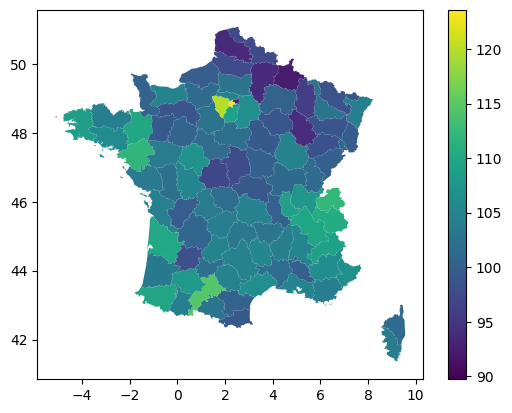

In [33]:
# IPS moyen par département en 2022
moy = df.loc[
    df['rentree_scolaire'] == "2022-2023"
].groupby('code')['ips'].mean().reset_index()
moy_geo = gpd.GeoDataFrame(pd.merge(
    moy,
    contours,
    on='code',
    how='left'
), geometry='geometry')
moy_geo.plot('ips', legend=True);

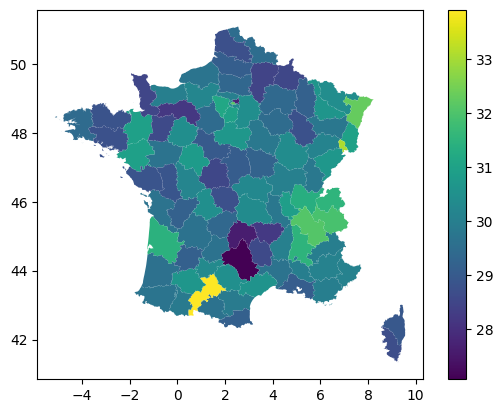

In [32]:
# Ecart type moyen des IPS par département en 2022 (inégalités locales)
std = df.loc[
    df['rentree_scolaire'] == "2022-2023"
].groupby('code')['ecart_type_de_l_ips'].mean().reset_index()
std_geo = gpd.GeoDataFrame(pd.merge(
    std,
    contours,
    on='code',
    how='left'
), geometry='geometry')
std_geo.plot('ecart_type_de_l_ips', legend=True);

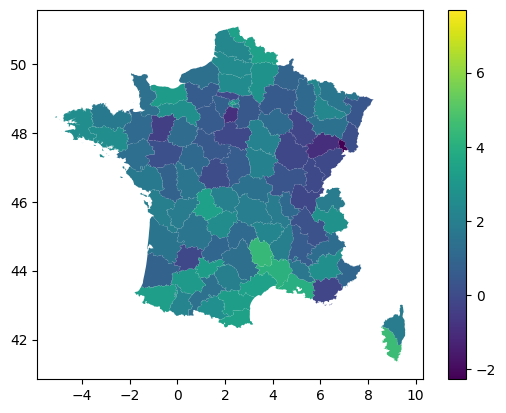

In [36]:
# évolution des IPS par département entre 2016 et 2022
before = "2016-2017"
after = "2022-2023"
moy_before = df.loc[
    df['rentree_scolaire'] == before
].groupby('code')['ips'].mean().reset_index()

moy_after = df.loc[
    df['rentree_scolaire'] == after
].groupby('code')['ips'].mean().reset_index()

compare = pd.merge(
    moy_before,
    moy_after,
    on='code',
    suffixes=[f'_{before}', f'_{after}']
)
compare['diff'] = compare[f'ips_{after}'] - compare[f'ips_{before}']
compare_geo = gpd.GeoDataFrame(pd.merge(
    compare,
    contours,
    on='code',
    how='left'
), geometry='geometry')
compare_geo.plot('diff', legend=True);